<class 'bytes'>
File data: 786486
File Size: 786486 bytes
Width: 512 pixels
Height: 512 pixels
Bit Depth: 24 bits per pixel
Offset: 54 bytes


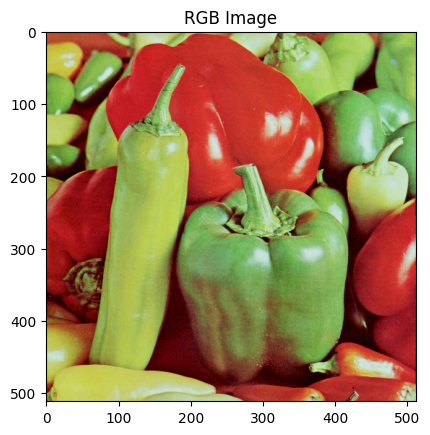

[[[ 93   0   0]
  [119  79  36]
  [139 135  58]
  ...
  [166 199 150]
  [171 205 181]
  [198 200 171]]

 [[ 92   0   0]
  [142 124  52]
  [126 115  48]
  ...
  [175 211 163]
  [176 206 170]
  [196 165 117]]

 [[ 92   0   0]
  [127 137  47]
  [136 145  54]
  ...
  [181 213 174]
  [177 210 170]
  [189 197 129]]

 ...

 [[126   0   0]
  [185 102  50]
  [185  93  48]
  ...
  [144 200  91]
  [148 200  77]
  [113 195  87]]

 [[123   0   0]
  [191  96  46]
  [190  87  51]
  ...
  [154 202  85]
  [136 188  86]
  [115 192  85]]

 [[101   0   0]
  [140   0 142]
  [151   0 146]
  ...
  [192   0 158]
  [205   0 177]
  [120   0 181]]]
(512, 512, 3)
BMP image written successfully to 'output_image.bmp'.
output_image.bmp
<class 'bytes'>
File data: 786486
File Size: 786486 bytes
Width: 512 pixels
Height: 512 pixels
Bit Depth: 24 bits per pixel
Offset: 54 bytes


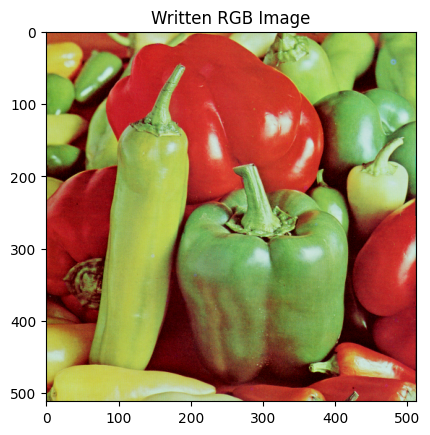

[[[ 93   0   0]
  [119  79  36]
  [139 135  58]
  ...
  [166 199 150]
  [171 205 181]
  [198 200 171]]

 [[ 92   0   0]
  [142 124  52]
  [126 115  48]
  ...
  [175 211 163]
  [176 206 170]
  [196 165 117]]

 [[ 92   0   0]
  [127 137  47]
  [136 145  54]
  ...
  [181 213 174]
  [177 210 170]
  [189 197 129]]

 ...

 [[126   0   0]
  [185 102  50]
  [185  93  48]
  ...
  [144 200  91]
  [148 200  77]
  [113 195  87]]

 [[123   0   0]
  [191  96  46]
  [190  87  51]
  ...
  [154 202  85]
  [136 188  86]
  [115 192  85]]

 [[101   0   0]
  [140   0 142]
  [151   0 146]
  ...
  [192   0 158]
  [205   0 177]
  [120   0 181]]]
(512, 512, 3)
<class 'bytes'>
File data: 130558
File Size: 130558 bytes
Width: 312 pixels
Height: 415 pixels
Bit Depth: 8 bits per pixel
Offset: 1078 bytes
Palette length:1024


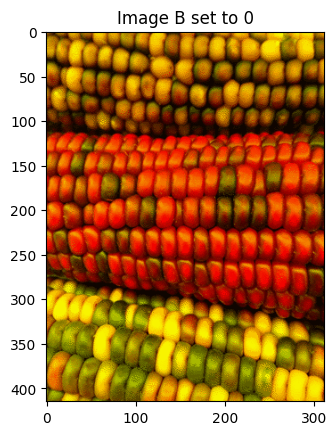

[[ 95  38 123 ...  68  21  85]
 [ 22  22  80 ...  79  81  56]
 [ 38  95 123 ...  68  17  56]
 ...
 [ 71  71  71 ...  98  90  98]
 [ 35  88  50 ...  64  98  98]
 [105 105  39 ...  98  98  59]]
(415, 312, 3)


In [ ]:
# -*- coding: utf-8 -*-
"""Exp-2B-<21EC39028>.ipynb

Automatically generated by Colab.

Original file is located at

"""

import struct
import numpy as np
import cv2
import matplotlib.pyplot as plt

"""PART 1: READING OF BMP FILE"""

def read_bmp_image(filename):
    with open(filename, 'rb') as f:
        data = f.read()

        # Check if the file is a BMP file
        signature = data[0:2].decode('utf-8')
        if signature != 'BM':
            raise ValueError("Not a valid BMP file.")

        # Extract header information
        file_size = int.from_bytes(data[2:6], 'little')
        offset = int.from_bytes(data[10:14], 'little')
        width = int.from_bytes(data[18:22], 'little')
        height = int.from_bytes(data[22:26], 'little')
        bit_depth = int.from_bytes(data[28:30], 'little')


        print(type(offset))

        print(type(data))
        print(f"File data: {len(data)}")
        print(f"File Size: {file_size} bytes")
        print(f"Width: {width} pixels")
        print(f"Height: {height} pixels")
        print(f"Bit Depth: {bit_depth} bits per pixel")
        print(f"Offset: {offset} bytes")

        if bit_depth == 8:
            # Extract color palette
            palette_size = offset - 54
            palette = data[54:54 + palette_size]
            pixel_array = data[offset:]
            print(f"Palette length:{len(palette)}")
            return data, pixel_array, width, height,offset, palette, bit_depth

        elif bit_depth == 24:
            # No palette for 24-bit images
            palette = None
            # Load pixel array into memory
            pixel_array = data[offset:]
            return data, pixel_array, width, height, offset,  palette, bit_depth

        else:
            raise ValueError("This function only supports 8-bit and 24-bit BMP images.")

def print_grayscale_image(pixel_array, width, height):
    # Reshape the pixel array into a 2D array (image) for easy visualization
    image_array = np.frombuffer(pixel_array, dtype=np.uint8).reshape((height, width))
    # Manually flip the image array vertically
    flipped_image_array = np.zeros_like(image_array)
    for y in range(height):
        flipped_image_array[y] = image_array[height - y - 1]

    # Display the image using matplotlib
    plt.imshow(flipped_image_array, cmap='gray', vmin=0, vmax=255)
    plt.title('Grayscale Image')
    plt.show()
    print(flipped_image_array)
    return flipped_image_array

def print_indexed_color_image(pixel_array, width, height, palette):
    # Convert the palette from bytes to a list of RGB tuples
    palette_rgb = []
    for i in range(0, len(palette), 4):  # 4 bytes per palette entry (R, G, B, reserved)
        b, g, r, _ = struct.unpack_from('BBBB', palette, i)
        palette_rgb.append((r, g, b))
    # Create an empty RGB image array
    image_array = np.zeros((height, width, 3), dtype=np.uint8)

    # Map the pixel indices to the RGB colors from the palette
    pixel_array = np.frombuffer(pixel_array, dtype=np.uint8).reshape((height, width))
    for y in range(height):
        for x in range(width):
            index = pixel_array[height - y - 1, x]
            image_array[y, x] = palette_rgb[index]

    # Display the image using matplotlib
    plt.imshow(image_array)
    plt.title('Indexed Color Image 8 Bit ')
    plt.show()
    print(pixel_array)
    return image_array

def print_rgb_image(pixel_array, width, height):
    # Each pixel in 24-bit BMP is represented by 3 bytes (BGR)
    image_array = np.frombuffer(pixel_array, dtype=np.uint8).reshape((height, width, 3))
    #print(image_array)
    # Convert BGR to RGB
    image_array = image_array[:, :, ::-1]

    # Manually flip the image array vertically
    flipped_image_array = np.zeros_like(image_array)
    for y in range(height):
        flipped_image_array[y] = image_array[height - y - 1]

    # Display the image using matplotlib
    plt.imshow(flipped_image_array)
    plt.title('RGB Image 24 Bit')
    plt.show()
    print(image_array)
    return flipped_image_array

"""MAIN FUNCTION"""

# Starting
filename = 'cameraman.bmp'
file_data,pixel_array, width, height, offset, palette, bit_depth = read_bmp_image(filename)

if palette is None:
    # 24-bit RGB image
    image_output = print_rgb_image(pixel_array, width, height)
elif len(palette) > 0:
    # 8-bit indexed color image
    image_output = print_indexed_color_image(pixel_array, width, height, palette)
else:
    # 8-bit grayscale image
    image_output = print_grayscale_image(pixel_array, width, height)
print(image_output.shape)

sign = 'BM'
new_data = bytearray()
new_data.extend(sign.encode('utf-8'))
print(int.from_bytes(file_data[50:54],'little'))

"""PART 2: WRITING OF BMP IMAGE"""

def write_bmp_image(data, image_output, width, height, bit_depth, offset):
    bmp_data = bytearray()
    # Total
    file_header_size = 14
    dib_header_size = 40

   # For 24-bit images
    if bit_depth == 24:

        bytes_per_pixel = bit_depth // 8
        pixel_data_size = height * width * bytes_per_pixel
        file_size = pixel_data_size + offset
        # BMP header and DIP header
        bmp_header = struct.pack('<2sIHHI', b'BM', file_size, 0, 0, offset)
        dib_header = struct.pack('<IIIHHIIIIII', dib_header_size, width, height, 1, bit_depth, 0, pixel_data_size, 0, 0, 0, 0)
      # Combine to form the full BMP header
        bmp_data.extend(bmp_header)
        bmp_data.extend(dib_header)
        #print(f"File Size: {int.from_bytes(bmp_data[2:6], 'little')} bytes"

        # Ensure 'image_output' is a NumPy array with shape (height, width, 3)
        if not isinstance(image_output, np.ndarray):
            raise TypeError("image_output must be a NumPy array.")

        # Adjust shape if necessary
        if image_output.shape != (height, width, 3):
            print(f"Adjusting image_output shape from {image_output.shape} to ({height}, {width}, 3).")
        temp_img = image_output.copy()
        temp_img = temp_img[:, :, ::-1]
        bmp_data.extend(temp_img.tobytes())

    elif bit_depth == 8:
        if image_output.shape == (height, width):  # Grayscale image
            print("Processing 8-bit grayscale image...")

            bytes_per_pixel = bit_depth // 8
            pixel_data_size = height * width * bytes_per_pixel
            file_size = pixel_data_size + offset
            # BMP header and DIP header
            bmp_header = struct.pack('<2sIHHI', b'BM', file_size, 0, 0, offset)
            dib_header = struct.pack('<IIIHHIIIIII', dib_header_size, width, height, 1, bit_depth, 0, pixel_data_size, 0, 0, 0, 0)
            # Combine to form the full BMP header
            bmp_data.extend(bmp_header)
            bmp_data.extend(dib_header)
            print(f"File Size: {int.from_bytes(bmp_data[2:6], 'little')} bytes")

            temp_image = np.zeros((height, width), dtype=np.uint8)
            for i in range(height):
                for j in range(width):
                    temp_image[i, j] = image_output[height - i - 1, j]

            bmp_data.extend(temp_image.tobytes())

        else:  # Indexed color image with palette
            print("Processing 8-bit indexed color image with a palette...")
            bytes_per_pixel = bit_depth // 8
            pixel_data_size = height*width*bytes_per_pixel
            file_size = pixel_data_size + offset
            # BMP header and DIP header
            bmp_header = struct.pack('<2sIHHI', b'BM', file_size, 0, 0, offset)
            dib_header = struct.pack('<IIIHHIIIIII', dib_header_size, width, height, 1, bit_depth, 0, pixel_data_size, 0, 0, 0, 0)
            # Combine to form the full BMP header
            bmp_data.extend(bmp_header)
            bmp_data.extend(dib_header)
            print(f"File Size: {int.from_bytes(bmp_data[2:6], 'little')} bytes")

            reverse_mapper = {}
            offset = int.from_bytes(data[10:14], 'little')
            palette_size = offset - 54
            palette = data[54:54 + palette_size]
            bmp_data.extend(palette)
            # Create reverse mapper (RGB to palette index)
            for i in range(0, len(palette), 4):  # 4 bytes per palette entry (B, G, R, reserved)
                b, g, r, _ = struct.unpack_from('BBBB', palette, i)
                reverse_mapper[(r, g, b)] = i // 4

            for x in range(height):
                for y in range(width):
                    r, g, b = image_output[height - x - 1, y]

                    # Find the corresponding palette index
                    if (r, g, b) in reverse_mapper:
                        palette_index = reverse_mapper[(r, g, b)]
                        bmp_data.extend(struct.pack('B', palette_index))
                    else:
                        raise KeyError(f"Color ({r}, {g}, {b}) not found in palette")

    # Define the output filename
    output_filename = "output_image.bmp"

    # Write the data to the output file
    with open(output_filename, 'wb') as f:
        f.write(bmp_data)
    print(f"BMP image written successfully to '{output_filename}'.")
    return output_filename

created_file = write_bmp_image(file_data, image_output, width, height, bit_depth, offset)
print(created_file)

def read_bmp_image(filename):
    with open(filename, 'rb') as f:
        data = f.read()

        # Check if the file is a BMP file
        signature = data[0:2].decode('utf-8')
        if signature != 'BM':
            raise ValueError("Not a valid BMP file.")

        # Extract header information
        file_size = int.from_bytes(data[2:6], 'little')
        offset = int.from_bytes(data[10:14], 'little')
        width = int.from_bytes(data[18:22], 'little')
        height = int.from_bytes(data[22:26], 'little')
        bit_depth = int.from_bytes(data[28:30], 'little')

        print(type(data))
        print(f"File data: {len(data)}")
        print(f"File Size: {file_size} bytes")
        print(f"Width: {width} pixels")
        print(f"Height: {height} pixels")
        print(f"Bit Depth: {bit_depth} bits per pixel")
        print(f"Offset: {offset} bytes")

        if bit_depth == 8:
            # Extract color palette
            palette_size = offset - 54
            palette = data[54:54 + palette_size]
            pixel_array = data[offset:]
            print(f"Palette length:{len(palette)}")
            return data, pixel_array, width, height, palette, bit_depth

        elif bit_depth == 24:
            # No palette for 24-bit images
            palette = None
            # Load pixel array into memory
            pixel_array = data[offset:]
            return data, pixel_array, width, height, palette, bit_depth

        else:
            raise ValueError("This function only supports 8-bit and 24-bit BMP images.")

def print_grayscale_image(pixel_array, width, height):
    # Reshape the pixel array into a 2D array (image) for easy visualization
    image_array = np.frombuffer(pixel_array, dtype=np.uint8).reshape((height, width))
    # Manually flip the image array vertically
    flipped_image_array = np.zeros_like(image_array)
    for y in range(height):
        flipped_image_array[y] = image_array[height - y - 1]

    # Display the image using matplotlib
    plt.imshow(flipped_image_array, cmap='gray', vmin=0, vmax=255)
    plt.title(' Written Grayscale Image')
    plt.show()
    print(flipped_image_array)
    return flipped_image_array

def print_indexed_color_image(pixel_array, width, height, palette):
    # Convert the palette from bytes to a list of RGB tuples
    palette_rgb = []
    for i in range(0, len(palette), 4):  # 4 bytes per palette entry (R, G, B, reserved)
        b, g, r, _ = struct.unpack_from('BBBB', palette, i)
        palette_rgb.append((r, g, b))
    # Create an empty RGB image array
    image_array = np.zeros((height, width, 3), dtype=np.uint8)

    # Map the pixel indices to the RGB colors from the palette
    pixel_array = np.frombuffer(pixel_array, dtype=np.uint8).reshape((height, width))
    for y in range(height):
        for x in range(width):
            index = pixel_array[height - y - 1, x]
            image_array[y, x] = palette_rgb[index]

    # Display the image using matplotlib
    plt.imshow(image_array)
    plt.title('Written Indexed Color Image')
    plt.show()
    print(pixel_array)
    return image_array

def print_rgb_image(pixel_array, width, height):
    # Each pixel in 24-bit BMP is represented by 3 bytes (BGR)
    image_array = np.frombuffer(pixel_array, dtype=np.uint8).reshape((height, width, 3))
    #print(image_array)
    # Convert BGR to RGB
    image_array = image_array[:, :, ::-1]

    # Manually flip the image array vertically
    flipped_image_array = np.zeros_like(image_array)
    for y in range(height):
        flipped_image_array[y] = image_array[height - y - 1]

    # Display the image using matplotlib
    plt.imshow(image_array)
    plt.title('Written RGB Image')
    plt.show()
    print(flipped_image_array)
    return flipped_image_array

# Starting
filename = created_file
file_data,pixel_array, width, height, palette, bit_depth = read_bmp_image(filename)

if palette is None:
    # 24-bit RGB image
    image_output = print_rgb_image(pixel_array, width, height)
elif len(palette) > 0:
    # 8-bit indexed color image
    image_output = print_indexed_color_image(pixel_array, width, height, palette)
else:
    # 8-bit grayscale image
    image_output = print_grayscale_image(pixel_array, width, height)
print(image_output.shape)